In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\titanic (1)\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
Age_Mean = df.Age.mean()
Age_Mean

np.float64(29.69911764705882)

In [7]:
df.Age.fillna(Age_Mean,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16172\4037467587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(Age_Mean,inplace=True)


In [8]:
Sex_Dummies = pd.get_dummies(df.Sex).astype("float")
Sex_Dummies

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.drop(["Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [11]:
New_df = pd.concat([df,Sex_Dummies],axis=1)
New_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,female,male
0,1,0,3,male,22.0,1,0,7.2500,0.0,1.0
1,2,1,1,female,38.0,1,0,71.2833,1.0,0.0
2,3,1,3,female,26.0,0,0,7.9250,1.0,0.0
3,4,1,1,female,35.0,1,0,53.1000,1.0,0.0
4,5,0,3,male,35.0,0,0,8.0500,0.0,1.0


In [12]:
New_df.drop("Sex",axis=1,inplace=True)
New_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,1,0,3,22.0,1,0,7.2500,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,0.0,1.0


In [13]:
New_df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.069809
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
female         0.543351
male          -0.543351
Name: Survived, dtype: float64

In [14]:
New_df.drop(["PassengerId","Age","SibSp","Parch"],axis="columns",inplace=True)
New_df.head()

,Survived,Pclass,Fare,female,male
0,0,3,7.2500,0.0,1.0
1,1,1,71.2833,1.0,0.0
2,1,3,7.9250,1.0,0.0
3,1,1,53.1000,1.0,0.0
4,0,3,8.0500,0.0,1.0


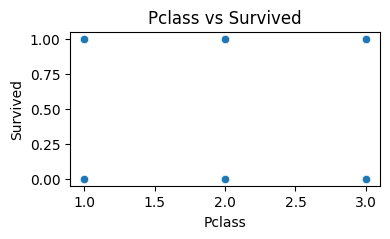

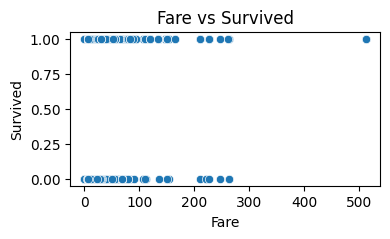

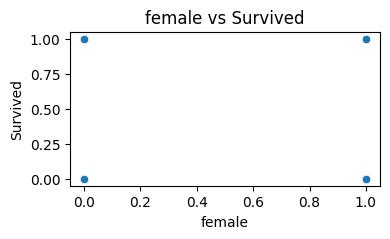

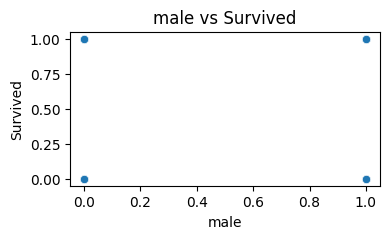

In [15]:
import seaborn as sns
for label in New_df.columns.to_list():
    if label != "Survived":
        plt.figure(figsize=(4, 2))  
        sns.scatterplot(x=label, y='Survived', data=New_df)
        plt.title(f"{label} vs Survived")
        plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score